In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
from scipy import stats


In [10]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Thyroid/gene-snp_eqtls_empiricalpvalues_allchr', sep='\t')

In [43]:
pvals = np.array(data['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.25, method='holm')

In [44]:
pvals_adj

(array([False, False, False, ..., False, False, False]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 1.2363242687940534e-05,
 1.0743908204048305e-05)

In [45]:
sum(pvals_adj[0])

0

In [46]:
np.argmin(pvals)

888

In [47]:
min(pvals)

9.7999804000392e-05

In [48]:
pvals_adj[1][888]

1.0

(array([ 449.,  432.,  426.,  564.,  609., 2383., 6513., 5115., 3572.,
        3206.]),
 array([9.7999804e-05, 1.0008620e-01, 2.0007440e-01, 3.0006260e-01,
        4.0005080e-01, 5.0003900e-01, 6.0002720e-01, 7.0001540e-01,
        8.0000360e-01, 8.9999180e-01, 9.9998000e-01]),
 <a list of 10 Patch objects>)

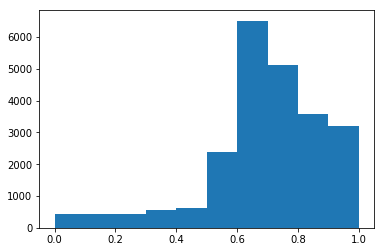

In [33]:
plt.hist(pvals)

In [36]:
emp_null = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr1/gene-snp_eqtls_sim500000_cpma_chr1')

(array([4.5206e+05, 3.9753e+04, 6.4080e+03, 1.3060e+03, 3.3200e+02,
        9.7000e+01, 2.8000e+01, 1.1000e+01, 3.0000e+00, 2.0000e+00]),
 array([    0.       ,  3617.1606625,  7234.321325 , 10851.4819875,
        14468.64265  , 18085.8033125, 21702.963975 , 25320.1246375,
        28937.2853   , 32554.4459625, 36171.606625 ]),
 <a list of 10 Patch objects>)

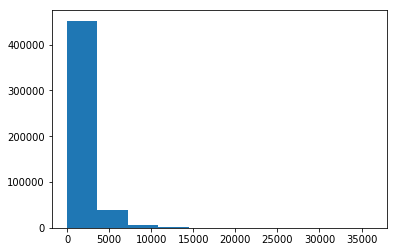

In [38]:
plt.hist(emp_null)

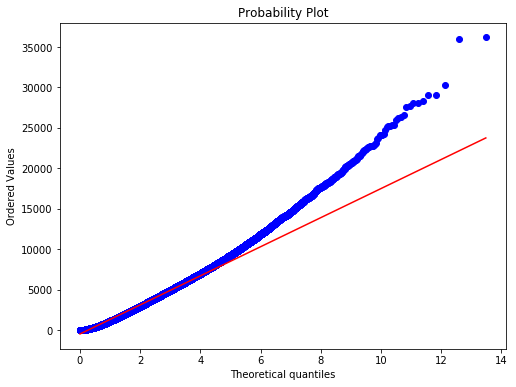

In [42]:
# pvalues = -np.log(emp_null)
# max_lklh = 1 / np.mean(pvalues)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
stats.probplot(emp_null, dist='expon', plot=ax)
# plt.title('pvalues of genes for chr7_45109068 hit, expon dist with lamda hat')

pass

In [55]:
data_prev = pd.read_csv('/storage/cynthiawu/trans_eQTL/Brain-Cerebellum/European/gene-snp_eqtls_allchr_empiricalpvalues', sep='\t')

In [56]:
data_prev

,snp,cpma,pvalue
0,chr1_100336361,142.868924,0.673718
1,chr1_100358103,52.688205,0.798291
2,chr1_100361925,321.555051,0.526825
3,chr1_100435079,187.756970,0.629079
4,chr1_100436133,0.039454,0.994404
...,...,...,...
34730,chr22_51048721,1607.094883,0.152737
34731,chr22_51064039,423.600178,0.467140
34732,chr22_51064416,343.349893,0.513026
34733,chr22_51065361,2814.543716,0.055905


In [27]:
pvals = np.array(data['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.25, method='holm')

NameError: name 'data' is not defined

In [25]:
?statsmodels.stats.multitest.multipletests

In [58]:
sum(pvals_adj[0])

0

(array([ 449.,  432.,  426.,  564.,  609., 2383., 6513., 5115., 3572.,
        3206.]),
 array([9.7999804e-05, 1.0008620e-01, 2.0007440e-01, 3.0006260e-01,
        4.0005080e-01, 5.0003900e-01, 6.0002720e-01, 7.0001540e-01,
        8.0000360e-01, 8.9999180e-01, 9.9998000e-01]),
 <a list of 10 Patch objects>)

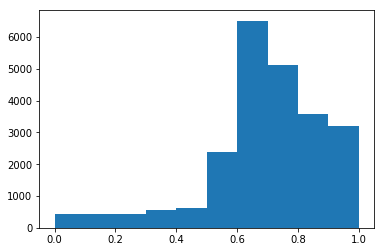

In [59]:
plt.hist(pvals)

### Real data after t-statistics fix

In [81]:
data_emp_convert = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_empiricalpvalues_chr7_converted', sep='\t')
data_emp = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_empiricalpvalues_chr7', sep='\t')


In [82]:
pvals = np.array(data_emp_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')

In [83]:
sum(pvals_adj[0])

1

Text(0, 0.5, 'count')

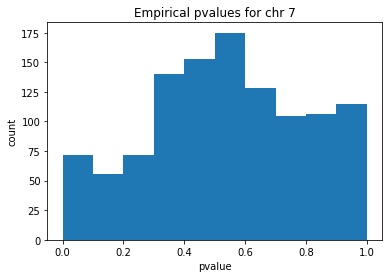

In [84]:
plt.hist(pvals)
plt.title('Empirical pvalues for chr 7')
plt.xlabel('pvalue')
plt.ylabel('count')

In [34]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.12525159976418013, pvalue=8.415543423182576e-16)

(array([   2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    6.,
        1114.]),
 array([0.00673199, 0.10603839, 0.20534479, 0.30465119, 0.40395759,
        0.50326399, 0.60257039, 0.7018768 , 0.8011832 , 0.9004896 ,
        0.999796  ]),
 <a list of 10 Patch objects>)

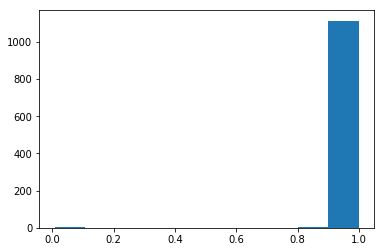

In [37]:
plt.hist(pvals_adj[1])

In [41]:
pvals = np.array(data_emp['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')

In [42]:
sum(pvals_adj[0])

1

(array([ 10.,  14.,  10.,  17.,  26.,  54., 157., 332., 267., 235.]),
 array([2.99999400e-05, 9.99538001e-02, 1.99877600e-01, 2.99801400e-01,
        3.99725201e-01, 4.99649001e-01, 5.99572801e-01, 6.99496601e-01,
        7.99420401e-01, 8.99344201e-01, 9.99268001e-01]),
 <a list of 10 Patch objects>)

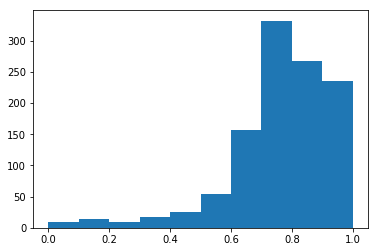

In [39]:
plt.hist(pvals)

In [14]:
data_emp_convert = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr1/gene-snp_eqtls_empiricalpvalues_chr1_converted', sep='\t')
data_emp = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr1/gene-snp_eqtls_empiricalpvalues_chr1', sep='\t')


In [15]:
pvals = np.array(data_emp_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')

In [16]:
sum(pvals_adj[0])

0

Text(0, 0.5, 'count')

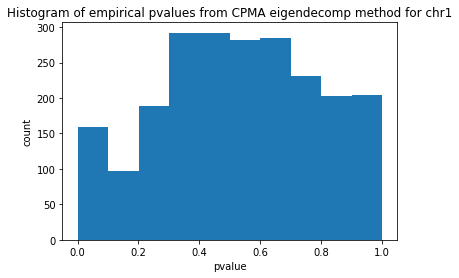

In [17]:
plt.hist(pvals)
plt.title('Histogram of empirical pvalues from CPMA eigendecomp method for chr1')
plt.xlabel('pvalue')
plt.ylabel('count')

In [52]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.10249060558753043, pvalue=7.107437156251278e-21)

In [10]:
data_emp_convert = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr1/permute/CPMA/gene-snp-eqtl_cpma_empirical', sep='\t')


In [11]:
pvals = np.array(data_emp_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')

Text(0, 0.5, 'count')

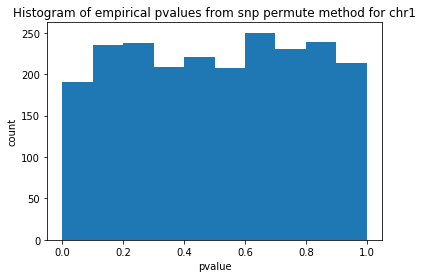

In [12]:
plt.hist(pvals)
plt.title('Histogram of empirical pvalues from snp permute method for chr1')
plt.xlabel('pvalue')
plt.ylabel('count')

In [5]:
sum(pvals_adj[0])

0

In [13]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.021615796324532338, pvalue=0.2477162622153126)

In [212]:
data_emp_convert = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/gene-snp_eqtls_empiricalpvalues_allchr_converted', sep='\t')
data_emp = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/gene-snp_eqtls_empiricalpvalues_allchr', sep='\t')


In [213]:
pvals = np.array(data_emp_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.15, method='fdr_bh')

Text(0.5, 1.0, 'pvals against uniform dist')

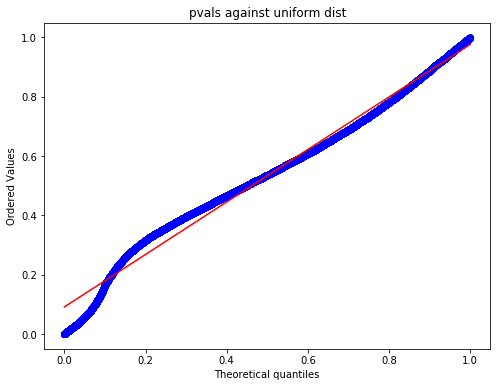

In [214]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
# stats.probplot(-np.log(pvals), dist='expon', plot=ax)
# plt.title('-log(pvals) against exponential dist')
stats.probplot(pvals, dist='uniform', plot=ax)
plt.title('pvals against uniform dist')

In [215]:
sum(pvals_adj[0])

1

Text(0, 0.5, 'count')

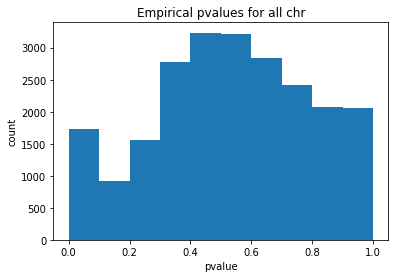

In [216]:
plt.hist(pvals)
plt.title('Empirical pvalues for all chr')
plt.xlabel('pvalue')
plt.ylabel('count')

In [73]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.1154336238208866, pvalue=4.7140474373890914e-257)

In [79]:
pvals = np.array(data_emp['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')

Text(0, 0.5, 'count')

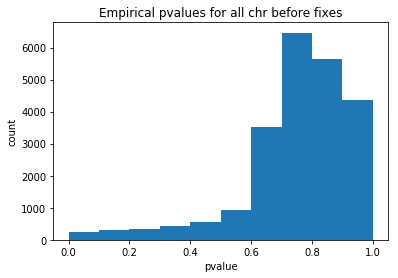

In [80]:
plt.hist(pvals)
plt.title('Empirical pvalues for all chr before fixes')
plt.xlabel('pvalue')
plt.ylabel('count')

## Simulated Data

### Null snps

In [61]:
sim_null = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_0/Simulation_0/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0', sep='\t')

In [63]:
pvals = np.array(sim_null['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.25, method='holm')

In [64]:
sum(pvals_adj[0])

2

(array([21., 16., 11.,  6.,  6., 10.,  7.,  8.,  5., 10.]),
 array([0.001992  , 0.1012062 , 0.2004204 , 0.2996346 , 0.3988488 ,
        0.498063  , 0.59727721, 0.69649141, 0.79570561, 0.89491981,
        0.99413401]),
 <a list of 10 Patch objects>)

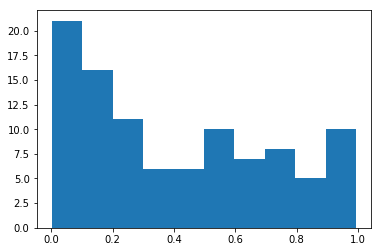

In [65]:
plt.hist(pvals)

In [69]:
sim_empnull = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_0/Simulation_0/CPMA/gene-snp-eqtl_sim500000_cpma.gz')

In [70]:
sim_empnull

array([ 213.194198,  515.812385,   35.548358, ...,   21.363565,
        516.172703, 1089.809437])

(array([4.80757e+05, 1.59110e+04, 2.44800e+03, 6.16000e+02, 1.82000e+02,
        6.10000e+01, 1.90000e+01, 4.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([    0.       ,  1606.3978445,  3212.795689 ,  4819.1935335,
         6425.591378 ,  8031.9892225,  9638.387067 , 11244.7849115,
        12851.182756 , 14457.5806005, 16063.978445 ]),
 <a list of 10 Patch objects>)

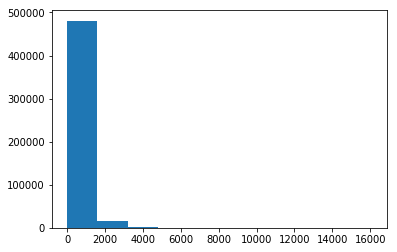

In [71]:
plt.hist(sim_empnull)

### 1 trans-eqtl (1000 targets), 99 null snps

In [41]:
sim_null_tar = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_1/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0', sep='\t')


In [42]:
pvals = np.array(sim_null_tar['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.25, method='holm')

In [43]:
sum(pvals_adj[0])

0

In [44]:
np.argmin(pvals)

33

(array([20., 14., 10.,  8.,  8.,  6., 12.,  5.,  5., 12.]),
 array([0.00392399, 0.10270199, 0.20148   , 0.300258  , 0.399036  ,
        0.497814  , 0.59659201, 0.69537001, 0.79414801, 0.89292601,
        0.99170402]),
 <a list of 10 Patch objects>)

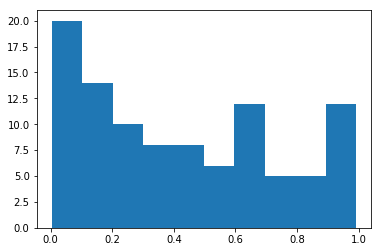

In [45]:
plt.hist(pvals)

In [131]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.1447887304225391, pvalue=0.02713350834403062)

(array([55., 20.,  7.,  5.,  6.,  2.,  3.,  0.,  0.,  2.]),
 array([7.34865701e-02, 3.44038063e+02, 6.88002639e+02, 1.03196722e+03,
        1.37593179e+03, 1.71989637e+03, 2.06386094e+03, 2.40782552e+03,
        2.75179010e+03, 3.09575467e+03, 3.43971925e+03]),
 <a list of 10 Patch objects>)

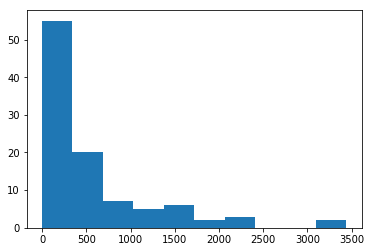

In [132]:
cpma = np.array(sim_null_tar['cpma'])
plt.hist(cpma)

(array([88.,  9.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([8.66582827e-02, 1.43227490e+03, 2.86446314e+03, 4.29665139e+03,
        5.72883963e+03, 7.16102787e+03, 8.59321612e+03, 1.00254044e+04,
        1.14575926e+04, 1.28897808e+04, 1.43219691e+04]),
 <a list of 10 Patch objects>)

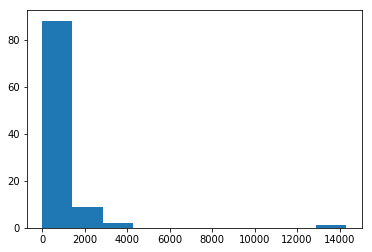

In [125]:
cpma = np.array(sim_null_tar['cpma'])
plt.hist(cpma)

In [84]:
sim_empnull_tar = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_sim500000_cpma.gz')

(array([4.64304e+05, 2.96730e+04, 4.65800e+03, 9.71000e+02, 2.54000e+02,
        9.80000e+01, 3.60000e+01, 3.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([    0.       ,  1928.1372362,  3856.2744724,  5784.4117086,
         7712.5489448,  9640.686181 , 11568.8234172, 13496.9606534,
        15425.0978896, 17353.2351258, 19281.372362 ]),
 <a list of 10 Patch objects>)

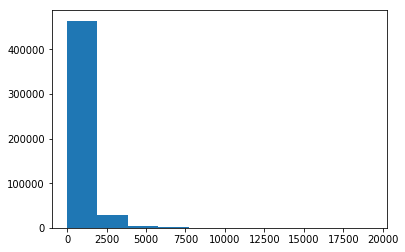

In [85]:
plt.hist(sim_empnull_tar)

In [156]:
sim_evalues1 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_0/Simulation_1/CPMA/gene-snp-eqtl_evalues.gz')
sim_evalues2 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_1/CPMA/gene-snp-eqtl_evalues.gz')
sim_evalues3 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_100/Beta_01/Simulation_1/CPMA/gene-snp-eqtl_evalues.gz')
sim_evalues4 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_5/Beta_01/Simulation_1/CPMA/gene-snp-eqtl_evalues.gz')


In [137]:
max(sim_evalues)

2155.1195836323704

In [141]:
max(sim_evalues)

2117.1699503926257

In [144]:
stats.ks_2samp(sim_evalues1, sim_evalues2)

Ks_2sampResult(statistic=0.02686666666666665, pvalue=3.8514963946591226e-05)

In [157]:
stats.ks_2samp(sim_evalues1, sim_evalues3)

Ks_2sampResult(statistic=0.013466666666666738, pvalue=0.13067754842581336)

In [159]:
stats.ks_2samp(sim_evalues2, sim_evalues4)

Ks_2sampResult(statistic=0.02293333333333336, pvalue=0.0007332460837978545)

In [151]:
sim_empnull_tar1 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_0/Simulation_0/CPMA/gene-snp-eqtl_sim500000_cpma.gz')
sim_empnull_tar2 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_sim500000_cpma.gz')
sim_empnull_tar3 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_100/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_sim500000_cpma.gz')
sim_empnull_tar4 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_5/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_sim500000_cpma.gz')



In [146]:
stats.ks_2samp(sim_empnull_tar1, sim_empnull_tar2)

Ks_2sampResult(statistic=0.12177799999999994, pvalue=0.0)

In [150]:
stats.ks_2samp(sim_empnull_tar1, sim_empnull_tar3)

Ks_2sampResult(statistic=0.0012799999999999478, pvalue=0.8070899262561458)

In [155]:
stats.ks_2samp(sim_empnull_tar2, sim_empnull_tar3)

Ks_2sampResult(statistic=0.12170400000000003, pvalue=0.0)

In [147]:
sim_null_tar1 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_1/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0', sep='\t')
sim_null_tar2 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_1/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0', sep='\t')
cpma1 = np.array(sim_null_tar1['cpma'])
cpma2 = np.array(sim_null_tar2['cpma'])

stats.ks_2samp(cpma1, cpma2)


Ks_2sampResult(statistic=0.0, pvalue=1.0)

(array([ 6.,  4., 16.,  8.,  5., 13., 15., 10., 13., 10.]),
 array([0.04320391, 0.13616933, 0.22913474, 0.32210016, 0.41506557,
        0.50803098, 0.6009964 , 0.69396181, 0.78692723, 0.87989264,
        0.97285805]),
 <a list of 10 Patch objects>)

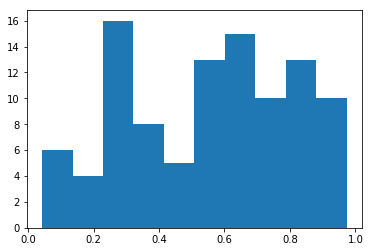

In [170]:
sim_null_tar_convert = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_0/Simulation_2/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
pvals = np.array(sim_null_tar_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)

In [171]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.13767352465295069, pvalue=0.04086453261870797)

In [138]:
sum(pvals_adj[0])

0

(array([ 3.,  0.,  0.,  0.,  1.,  0.,  0., 49., 24., 23.]),
 array([0.71046525, 0.73931112, 0.768157  , 0.79700287, 0.82584875,
        0.85469462, 0.8835405 , 0.91238638, 0.94123225, 0.97007813,
        0.998924  ]),
 <a list of 10 Patch objects>)

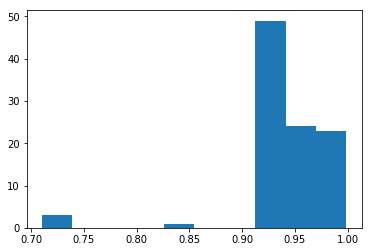

In [107]:
plt.hist(pvals_adj[1])

In [109]:
sim_null_tar = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_0/Simulation_0/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0', sep='\t')


In [110]:
pvals = np.array(sim_null_tar['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
sum(pvals_adj[0])

0

(array([21., 16., 11.,  6.,  6., 10.,  7.,  8.,  5., 10.]),
 array([0.001992  , 0.1012062 , 0.2004204 , 0.2996346 , 0.3988488 ,
        0.498063  , 0.59727721, 0.69649141, 0.79570561, 0.89491981,
        0.99413401]),
 <a list of 10 Patch objects>)

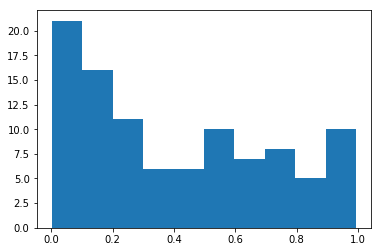

In [111]:
plt.hist(pvals)

(array([ 4.,  7.,  6.,  5., 16.,  7.,  6., 16., 16., 17.]),
 array([2.79999440e-04, 9.99838000e-02, 1.99687601e-01, 2.99391401e-01,
        3.99095202e-01, 4.98799002e-01, 5.98502803e-01, 6.98206604e-01,
        7.97910404e-01, 8.97614205e-01, 9.97318005e-01]),
 <a list of 10 Patch objects>)

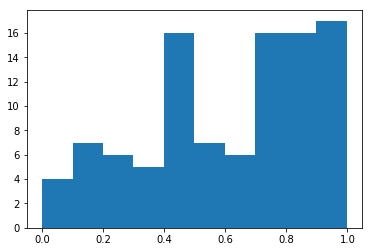

In [165]:
sim_null_tar_convert = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_8/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
pvals = np.array(sim_null_tar_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)

In [166]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.1940925918148163, pvalue=0.0008944602665492614)

In [121]:
sum(pvals_adj[0])

0

(array([18.,  9., 14.,  9.,  9., 10.,  6.,  8.,  7., 10.]),
 array([0.002238  , 0.1014248 , 0.2006116 , 0.2997984 , 0.3989852 ,
        0.498172  , 0.59735881, 0.69654561, 0.79573241, 0.89491921,
        0.99410601]),
 <a list of 10 Patch objects>)

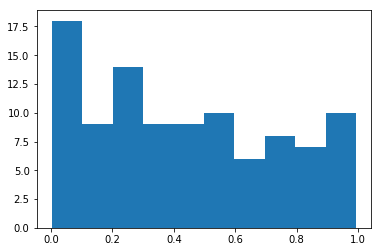

In [122]:
sim_null_tar_convert = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_7/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0', sep='\t')
pvals = np.array(sim_null_tar_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)

In [123]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.13311707376585247, pvalue=0.05254130073397042)

In [124]:
sum(pvals_adj[0])

0

In [167]:
15 * 0.05**2 * 0.95**4

0.030543984375

Text(0, 0.5, 'count')

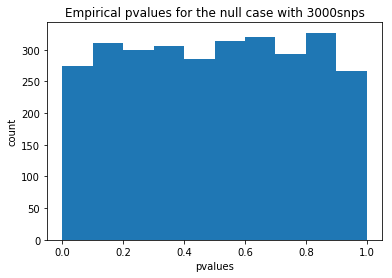

In [205]:
sim_null_tar_convert = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_0/Beta_0/Simulation_0/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
pvals = np.array(sim_null_tar_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for the null case with 3000snps')
plt.xlabel('pvalues')
plt.ylabel('count')

In [173]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.012702460595078735, pvalue=0.7183107888955583)

In [174]:
sum(pvals_adj[0])

0

Text(0, 0.5, 'count')

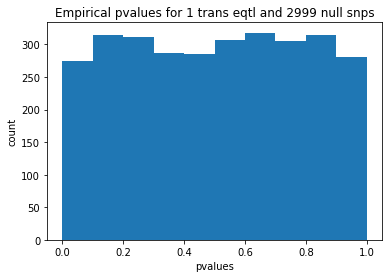

In [226]:
sim_null_tar_convert = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Round1/Simulation_0/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
pvals = np.array(sim_null_tar_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 1 trans eqtl and 2999 null snps')
plt.xlabel('pvalues')
plt.ylabel('count')

In [227]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.012468405063189858, pvalue=0.7394440516816287)

In [228]:
sum(pvals_adj[0])

0

Text(0, 0.5, 'count')

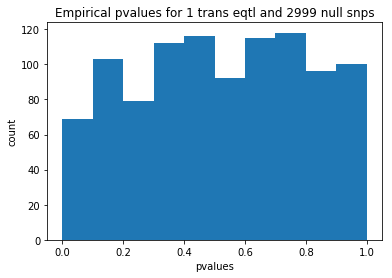

In [254]:
sim_null_tar_convert = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_1/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
pvals = np.array(sim_null_tar_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.15, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 1 trans eqtl and 2999 null snps')
plt.xlabel('pvalues')
plt.ylabel('count')

In [255]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.05183938432123136, pvalue=0.008932138084394097)

In [256]:
sum(pvals_adj[0])

0

Text(0, 0.5, 'count')

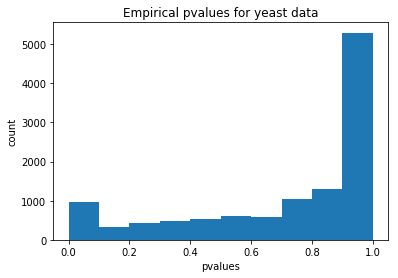

In [217]:
sim_null_tar_convert = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/Simulation_0/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
pvals = np.array(sim_null_tar_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for yeast data')
plt.xlabel('pvalues')
plt.ylabel('count')

In [179]:
sum(pvals_adj[0])

293

Text(0, 0.5, 'count')

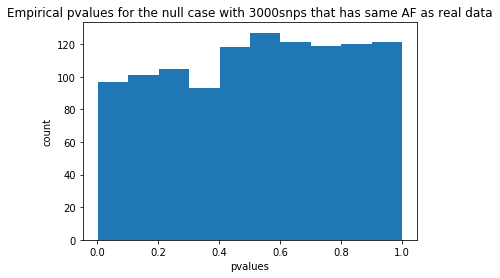

In [207]:
sim_null_tar_convert = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/AF/numTarget_0/Beta_0/Simulation_0/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
pvals = np.array(sim_null_tar_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for the null case with 3000snps that has same AF as real data')
plt.xlabel('pvalues')
plt.ylabel('count')

In [204]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.050226354092746395, pvalue=0.006715585681188007)

In [203]:
sum(pvals_adj[0])

0

Text(0, 0.5, 'count')

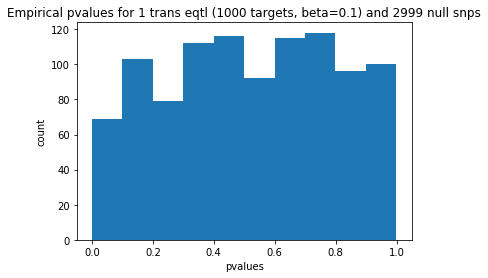

In [285]:
sim_null_tar_convert = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_1/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
pvals = np.array(sim_null_tar_convert['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.2, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 1 trans eqtl (1000 targets, beta=0.1) and 2999 null snps')
plt.xlabel('pvalues')
plt.ylabel('count')

In [286]:
sum(pvals_adj[0])

1

In [287]:
pvals_adj

(array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

Text(0, 0.5, 'count')

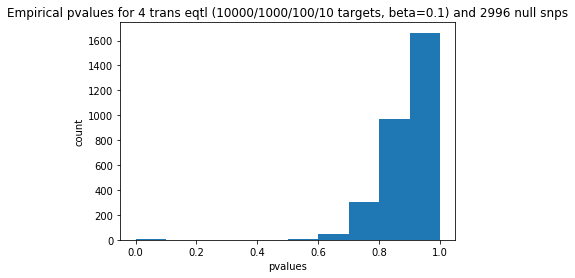

In [19]:
pc_eqtls = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/4eqtls/expressionPCs/gene-snp-eqtl_PCs_cpmax_pvalues_1.0', sep='\t')
pvals = np.array(pc_eqtls['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 4 trans eqtl (10000/1000/100/10 targets, beta=0.1) and 2996 null snps')
plt.xlabel('pvalues')
plt.ylabel('count')

In [20]:
sum(pvals_adj[0])

3

In [25]:
pc_eqtls['adj_pvalue'] = pvals_adj[1]

In [27]:
pc_eqtls.sort_values(by='adj_pvalue')

,snp,cpma,pvalue,adj_pvalue
0,SNP0,28.543286,9.162698e-08,0.000275
2223,SNP3,22.184973,2.476042e-06,0.003714
1,SNP1,17.974728,2.238573e-05,0.022386
1995,SNP2794,0.000767,9.779110e-01,0.999992
1996,SNP2795,0.013836,9.063634e-01,0.999992
...,...,...,...,...
1003,SNP1900,0.103474,7.476993e-01,0.999992
1004,SNP1901,0.001592,9.681714e-01,0.999992
1005,SNP1902,0.033065,8.557092e-01,0.999992
996,SNP1895,0.020636,8.857740e-01,0.999992


Text(0, 0.5, 'count')

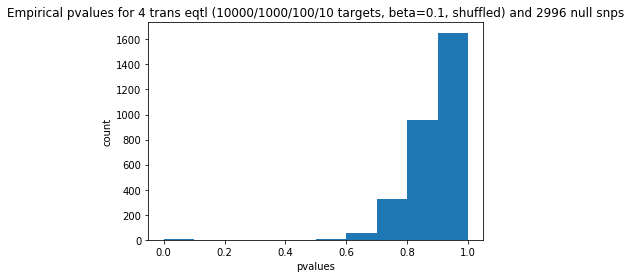

In [28]:
pc_eqtls = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/4eqtls_shuffled/expressionPCs/gene-snp-eqtl_PCs_cpmax_pvalues_1.0', sep='\t')
pvals = np.array(pc_eqtls['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 4 trans eqtl (10000/1000/100/10 targets, beta=0.1, shuffled) and 2996 null snps')
plt.xlabel('pvalues')
plt.ylabel('count')

In [29]:
sum(pvals_adj[0])

3

In [30]:
pc_eqtls['adj_pvalue'] = pvals_adj[1]
pc_eqtls.sort_values(by='adj_pvalue')

,snp,cpma,pvalue,adj_pvalue
2223,SNP3,36.795987,1.311600e-09,0.000004
0,SNP0,28.113036,1.144325e-07,0.000172
1,SNP1,21.031916,4.516960e-06,0.004517
1995,SNP2794,0.000827,9.770597e-01,0.999933
1996,SNP2795,0.004937,9.439850e-01,0.999933
...,...,...,...,...
1003,SNP1900,0.093205,7.601416e-01,0.999933
1004,SNP1901,0.013476,9.075843e-01,0.999933
1005,SNP1902,0.010772,9.173367e-01,0.999933
996,SNP1895,0.009139,9.238405e-01,0.999933


### Comparing similarity of cov matrices (input and inferred)

In [11]:
def getCov(input):
    print(f'Reading datafile {input}')
    data = pd.read_csv(input, sep='\t', index_col=0)
    col = ['Gene' + str(i) for i in range(15000)]
    data = data[col]
    genes = list(data.columns)
#     print(genes)
    scores = np.transpose(np.array(data))

    cov = np.cov(scores)
    #cov_matrix = pd.DataFrame(cov, columns=genes)
    print('cov matrix calculated')
    return cov

In [3]:
zscore_1000 = '/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_zscore.gz'
zscore_10000 = '/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_zscore.gz'

In [5]:
col = ['Gene' + str(i) for i in range(15000)]

In [12]:
cov_1000 = getCov(zscore_1000)

Reading datafile /gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_zscore.gz
cov matrix calculated


In [13]:
cov_10000 = getCov(zscore_10000)

Reading datafile /gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_zscore.gz
cov matrix calculated


In [22]:
cov_real = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/genecorr_realdatacov')

In [14]:
cov_10000

array([[ 1.07138669, -0.39258985, -0.08575744, ..., -0.16093145,
         0.00598418, -0.01642725],
       [-0.39258985,  1.25981992,  0.03530207, ...,  0.26556155,
        -0.1284185 ,  0.16486254],
       [-0.08575744,  0.03530207,  1.02891371, ...,  0.0500864 ,
         0.0556702 ,  0.18212662],
       ...,
       [-0.16093145,  0.26556155,  0.0500864 , ...,  0.94929019,
         0.07655945, -0.02555741],
       [ 0.00598418, -0.1284185 ,  0.0556702 , ...,  0.07655945,
         0.81425897,  0.1560264 ],
       [-0.01642725,  0.16486254,  0.18212662, ..., -0.02555741,
         0.1560264 ,  0.93598621]])

In [31]:
cov_1000_flat = cov_1000.flatten()

In [18]:
cov_10000_flat = cov_10000.flatten()

In [21]:
len(cov_10000_flat)

225000000

In [24]:
cov_real_flat = cov_real.flatten()

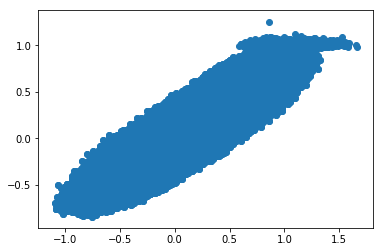

In [25]:
plt.scatter(cov_10000_flat, cov_real_flat)

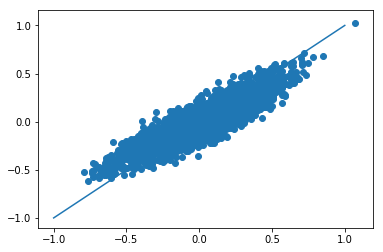

In [30]:
x = np.linspace(-1, 1, 1000)
plt.plot(x, x)
plt.scatter(cov_10000_flat[:2000], cov_real_flat[:2000])

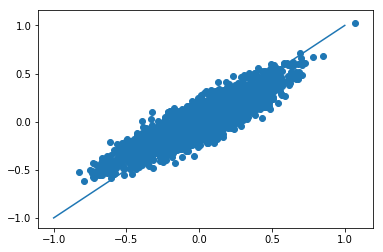

In [32]:
x = np.linspace(-1, 1, 1000)
plt.plot(x, x)
plt.scatter(cov_1000_flat[:2000], cov_real_flat[:2000])

In [35]:
stats.ks_2samp(cov_1000_flat[:2000], cov_10000_flat[:2000])


Ks_2sampResult(statistic=0.023499999999999965, pvalue=0.6338418888645521)

In [37]:
stats.ks_2samp(cov_10000_flat[:2000], cov_real_flat[:2000])


Ks_2sampResult(statistic=0.07199999999999995, pvalue=5.794713392052489e-05)

## PCA to find outliers

In [46]:
eigenvectors_chr7 = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_Q_chr7.gz')

In [55]:
eigenvalues_chr7 = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_evalues_chr7.gz')

In [49]:
eigenvectors_chr7.T.shape

(16414, 16414)

In [54]:
(eigenvectors_chr7.T[0])

array([-0.01513223, -0.60556039, -0.49771169, ...,  0.00068049,
       -0.00123797,  0.00165531])

In [58]:
eigenvalues_chr7[-1]

2570.63093998166

In [60]:
eigenvalues_chr7[-4:]

array([ 181.6895497 ,  190.99801223,  222.25433192, 2570.63093998])

In [62]:
eigenvectors_chr7[-1]

array([ 0.00165531,  0.00184685, -0.00159847, ..., -0.00526216,
        0.00905325, -0.00322945])

Text(0, 0.5, 'PC2')

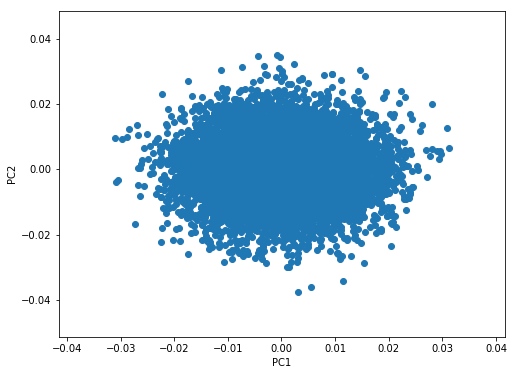

In [63]:
fig = plt.figure()
fig.set_size_inches((8, 6))
ax = fig.add_subplot(111)
ax.scatter(eigenvectors_chr7[-1], eigenvectors_chr7[-2])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

Text(0, 0.5, 'PC5')

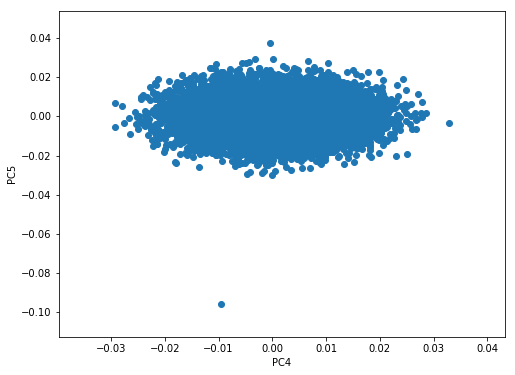

In [86]:
fig = plt.figure()
fig.set_size_inches((8, 6))
ax = fig.add_subplot(111)
ax.scatter(eigenvectors_chr7[-4], eigenvectors_chr7[-5])
ax.set_xlabel("PC4")
ax.set_ylabel("PC5")

Text(0, 0.5, 'PC2')

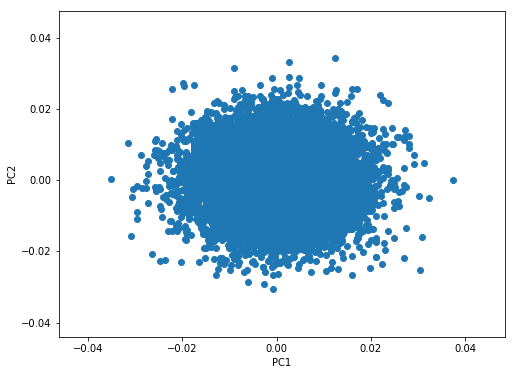

In [72]:
fig = plt.figure()
fig.set_size_inches((8, 6))
ax = fig.add_subplot(111)
ax.scatter(eigenvectors_chr7[-8], eigenvectors_chr7[-7])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

In [75]:
min(eigenvectors_chr7[-5])

-0.09593172362818524

In [77]:
np.argmin(eigenvectors_chr7[-5])

15311

In [78]:
?pd.read_csv

In [82]:
genes = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_zscore_chr7', nrows=0, sep='\t')


In [85]:
genes.columns[15312]

'ENSG00000211460.11'

In [87]:
eigenvectors_chr8 = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr8/gene-snp_eqtls_Q_chr8.gz')

Text(0, 0.5, 'PC2')

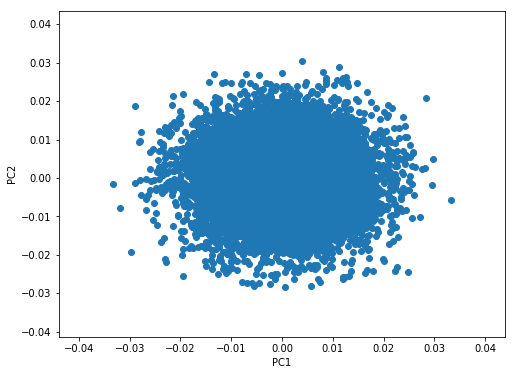

In [96]:
fig = plt.figure()
fig.set_size_inches((8, 6))
ax = fig.add_subplot(111)
ax.scatter(eigenvectors_chr8[-9], eigenvectors_chr8[-10])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

In [ ]:
eigenvectors_chr8

In [97]:
sim_cpma_chr7 = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_sim500000_cpma_chr7')

In [101]:
obs_cpma_chr7 = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_cpma_chr7', sep='\t')


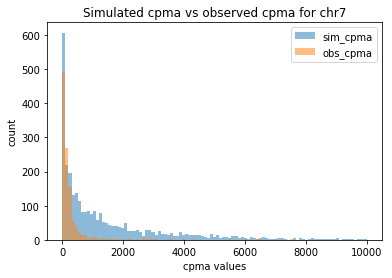

In [132]:
bins = np.linspace(0, 10000, 100)
# bins = 1000

plt.hist(sim_cpma_chr7[:3000], bins, alpha=0.5, label='sim_cpma')
plt.hist(list(obs_cpma_chr7['cpma']), bins, alpha=0.5, label='obs_cpma')
plt.legend(loc='upper right')
plt.xlabel('cpma values')
plt.ylabel('count')
plt.title('Simulated cpma vs observed cpma for chr7')
plt.show()

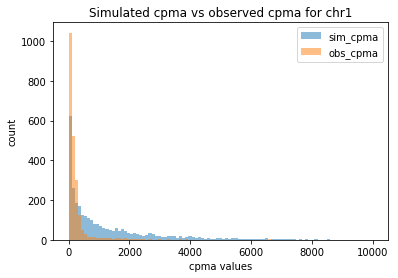

In [133]:
sim_cpma_chr1 = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr1/gene-snp_eqtls_sim500000_cpma_chr1')
obs_cpma_chr1 = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr1/gene-snp_eqtls_cpma_chr1', sep='\t')

bins = np.linspace(0, 10000, 100)
# bins = 1000

plt.hist(sim_cpma_chr1[:3000], bins, alpha=0.5, label='sim_cpma')
plt.hist(list(obs_cpma_chr1['cpma']), bins, alpha=0.5, label='obs_cpma')
plt.legend(loc='upper right')
plt.xlabel('cpma values')
plt.ylabel('count')
plt.title('Simulated cpma vs observed cpma for chr1')
plt.show()

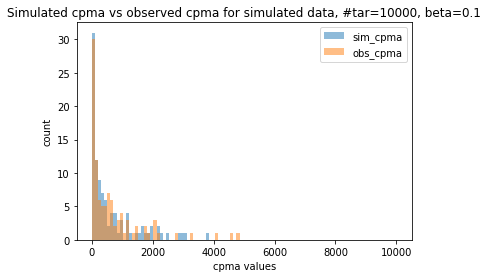

In [196]:
sim_cpma_sim1 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_sim500000_cpma.gz')
obs_cpma_sim1 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/CPMAx/gene-snp-eqtl_cpma_topx_1.0', sep='\t')

bins = np.linspace(0, 10000, 100)
# bins = 1000

plt.hist(sim_cpma_sim1[:100], bins, alpha=0.5, label='sim_cpma')
plt.hist(list(obs_cpma_sim1['cpma']), bins, alpha=0.5, label='obs_cpma')
plt.legend(loc='upper right')
plt.xlabel('cpma values')
plt.ylabel('count')
plt.title('Simulated cpma vs observed cpma for simulated data, #tar=10000, beta=0.1')
plt.show()

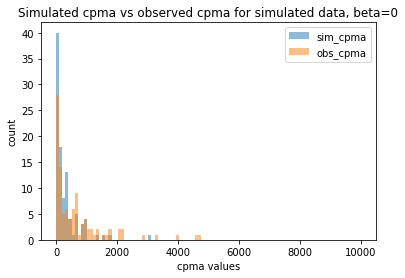

In [197]:
sim_cpma_sim2 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_100/Beta_0/Simulation_0/CPMA/gene-snp-eqtl_sim500000_cpma.gz')
obs_cpma_sim2 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_100/Beta_0/Simulation_0/CPMAx/gene-snp-eqtl_cpma_topx_1.0', sep='\t')

bins = np.linspace(0, 10000, 100)
# bins = 1000

plt.hist(sim_cpma_sim2[:100], bins, alpha=0.5, label='sim_cpma')
plt.hist(list(obs_cpma_sim2['cpma']), bins, alpha=0.5, label='obs_cpma')
plt.legend(loc='upper right')
plt.xlabel('cpma values')
plt.ylabel('count')
plt.title('Simulated cpma vs observed cpma for simulated data, beta=0')
plt.show()

In [17]:
len(list(obs_cpma_chr7['cpma']))

1122

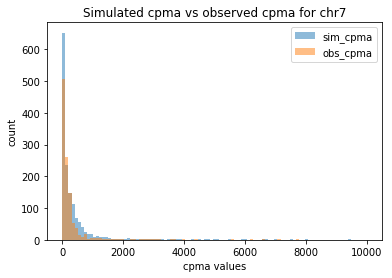

In [18]:
sim_cpma_chr7 = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_sim500000_cpma_chr7_converted')
obs_cpma_chr7 = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_cpma_converted_chr7', sep='\t')

bins = np.linspace(0, 10000, 100)
# bins = 1000

plt.hist(sim_cpma_chr7[:1500], bins, alpha=0.5, label='sim_cpma')
plt.hist(list(obs_cpma_chr7['cpma']), bins, alpha=0.5, label='obs_cpma')
plt.legend(loc='upper right')
plt.xlabel('cpma values')
plt.ylabel('count')
plt.title('Simulated cpma vs observed cpma for chr7')
plt.show()

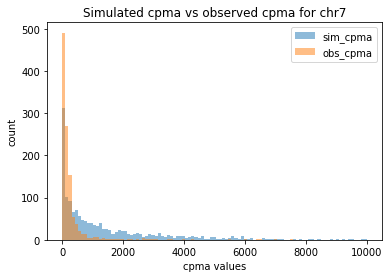

In [19]:
sim_cpma_chr7 = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_sim500000_cpma_chr7')
obs_cpma_chr7 = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_cpma_chr7', sep='\t')

bins = np.linspace(0, 10000, 100)
# bins = 1000

plt.hist(sim_cpma_chr7[:1500], bins, alpha=0.5, label='sim_cpma')
plt.hist(list(obs_cpma_chr7['cpma']), bins, alpha=0.5, label='obs_cpma')
plt.legend(loc='upper right')
plt.xlabel('cpma values')
plt.ylabel('count')
plt.title('Simulated cpma vs observed cpma for chr7')
plt.show()

(array([ 10.,  14.,  10.,  17.,  26.,  54., 157., 332., 267., 235.]),
 array([2.99999400e-05, 9.99538001e-02, 1.99877600e-01, 2.99801400e-01,
        3.99725201e-01, 4.99649001e-01, 5.99572801e-01, 6.99496601e-01,
        7.99420401e-01, 8.99344201e-01, 9.99268001e-01]),
 <a list of 10 Patch objects>)

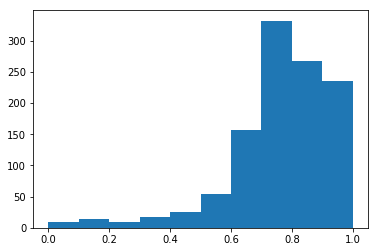

In [193]:
epvalues_chr7 = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_empiricalpvalues_chr7', sep='\t')
plt.hist(list(epvalues_chr7['pvalue']))

In [198]:
mzscores_chr7 = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_meanzscores_chr7.gz')

Text(0.5, 1.0, 'Mean zscores for chr7')

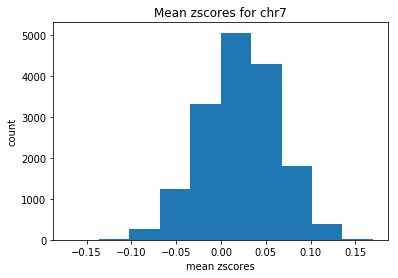

In [199]:
plt.hist(mzscores_chr7)
plt.xlabel('mean zscores')
plt.ylabel('count')
plt.title('Mean zscores for chr7')


In [135]:
stats.kstest(mzscores_chr7, 'norm')

KstestResult(statistic=0.4600986764449576, pvalue=0.0)

Text(0.5, 1.0, 'Mean zscores for chr1')

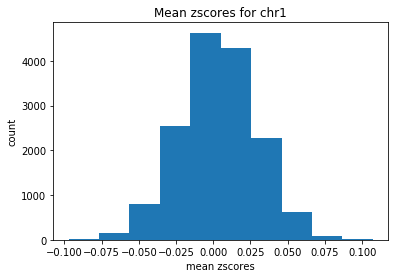

In [200]:
mzscores_chr1 = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr1/gene-snp_eqtls_meanzscores_chr1.gz')
plt.hist(mzscores_chr1)
plt.xlabel('mean zscores')
plt.ylabel('count')
plt.title('Mean zscores for chr1')


In [136]:
stats.kstest(mzscores_chr1, 'norm')

KstestResult(statistic=0.45968486224412497, pvalue=0.0)

Text(0.5, 1.0, 'Mean zscores for simulated data, #tar=10000, beta=0.1')

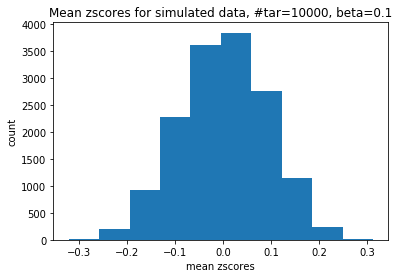

In [201]:
mzscore_sim = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_meanzscores.gz')
plt.hist(mzscore_sim)
plt.xlabel('mean zscores')
plt.ylabel('count')
plt.title('Mean zscores for simulated data, #tar=10000, beta=0.1')


In [161]:
stats.kstest(mzscore_sim, 'norm')

KstestResult(statistic=0.41118408783305815, pvalue=0.0)

Text(0.5, 1.0, 'Mean zscores for simulated data, #tar=1000, beta=0.1')

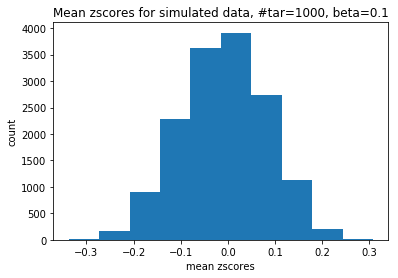

In [202]:
mzscore_sim2 = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_meanzscores.gz')
plt.hist(mzscore_sim2)
plt.xlabel('mean zscores')
plt.ylabel('count')
plt.title('Mean zscores for simulated data, #tar=1000, beta=0.1')


In [163]:
stats.kstest(mzscore_sim2, 'norm')

KstestResult(statistic=0.41481309884343776, pvalue=0.0)

In [145]:
zscore_chr7 = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_zscore_chr7', sep='\t', index_col='SNP')

In [146]:
zscore_chr7

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000283654.1,ENSG00000283755.1,ENSG00000283787.1,ENSG00000283886.1,ENSG00000283992.1,ENSG00000284024.1,ENSG00000284308.1,ENSG00000284395.1,ENSG00000284484.1,ENSG00000284526.1
SNP,,,,,,,,,,,,,,,,,,,,,
chr7_100057066,-1.194905,-0.989951,0.085893,-0.747012,-0.269110,-0.003177,-0.825698,-0.076411,0.066403,0.780844,...,-0.305278,-0.256691,-0.143565,0.487843,0.829249,0.013414,0.956277,-0.159164,-0.465362,0.895194
chr7_100095455,-0.756337,-0.871391,0.549277,-0.671336,-0.411788,0.401482,-0.349128,0.246617,0.694756,1.033462,...,-0.811835,0.056917,-0.777994,-0.316791,0.736812,0.275794,1.410857,-0.215873,-0.680129,0.226305
chr7_100099174,1.041422,-1.782296,-0.771204,-0.075696,0.028032,0.285607,-0.617292,-0.979487,-0.907379,-0.787671,...,-0.818588,2.135437,0.771527,-1.967100,-0.301857,2.660843,0.323411,0.973948,0.785700,-1.029525
chr7_100105324,-0.010865,3.659655,0.605950,0.542554,0.993225,1.273617,1.669402,2.385555,0.213009,-0.155450,...,0.141283,1.027542,-1.502846,-1.018222,-1.301717,-1.779059,0.239861,-1.318693,0.054190,-0.359449
chr7_100149507,-0.101808,-2.561385,-0.633569,-0.623793,-0.675597,0.066559,-0.366342,-1.073344,-0.369705,0.064302,...,-1.303152,2.330475,0.882909,-0.681763,0.587174,3.061316,1.273964,1.060714,0.711487,-0.571049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr7_99876804,0.788961,1.504527,-1.096855,1.331297,0.561286,0.695375,-0.492874,-0.274512,-0.492503,-0.637976,...,0.940053,-0.612016,0.059199,-1.184227,-0.207208,0.837718,-0.569625,-1.384527,0.450739,-1.189113
chr7_99892567,-0.947238,-0.868502,0.004272,-0.870927,-1.009589,-0.782124,0.481504,-1.203861,-0.827929,-0.687802,...,-0.712436,0.589207,-0.374037,0.192240,-0.350528,0.082410,0.274522,2.145422,0.668270,-0.969537
chr7_99903276,0.802177,0.687440,-1.940201,0.330290,0.234834,0.661739,-0.814102,-1.658930,-0.858935,-0.793666,...,0.163596,-0.909741,-0.437089,-1.282021,-0.356196,0.501098,-0.757908,-1.122910,0.005461,-1.514901


In [144]:
?pd.read_csv

Text(0.5, 1.0, 'zscores chr7_100057066 in real data')

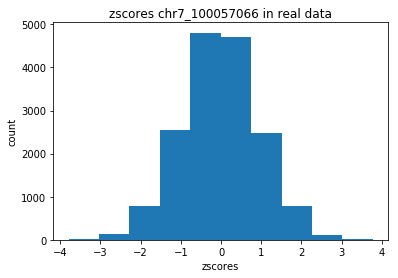

In [203]:
plt.hist(list(zscore_chr7.loc['chr7_100057066']))
plt.xlabel('zscores')
plt.ylabel('count')
plt.title('zscores chr7_100057066 in real data')

In [159]:
stats.kstest(list(zscore_chr7.loc['chr7_100057066']), 'norm')

KstestResult(statistic=0.01978141473825923, pvalue=5.274679458995891e-06)

Text(0.5, 1.0, 'zscores chr7_99971771 in real data')

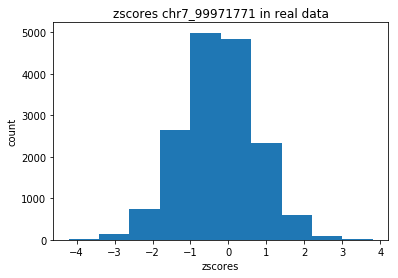

In [204]:
plt.hist(list(zscore_chr7.loc['chr7_99971771']))
plt.xlabel('zscores')
plt.ylabel('count')
plt.title('zscores chr7_99971771 in real data')

In [158]:
stats.kstest(list(zscore_chr7.loc['chr7_99971771']), 'norm')

KstestResult(statistic=0.1041908453738144, pvalue=3.3934868865644547e-155)

In [165]:
eigenvectors_chr7.shape

(16414, 16414)

In [166]:
evalues_chr7 = np.loadtxt('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_evalues_chr7.gz')

In [168]:
len(evalues_chr7)

16414

In [ ]:
mzscores_chr7

In [169]:
diag_e_values = np.diag(evalues_chr7)
E = np.sqrt(diag_e_values)
e_matrix = np.dot(eigenvectors_chr7, E)

cur_n = 2

z=np.random.normal(0, 1, (16414, cur_n))
#print(z.shape)
mzscores_tile = np.transpose(np.tile(mzscores_chr7, (cur_n, 1)))
#print(mzscores_tile.shape)
sim_zscores = mzscores_tile + np.dot(e_matrix, z)

In [171]:
sim_zscores.shape

(16414, 2)

Text(0.5, 1.0, 'simulated zscores set1 for chr7, real data')

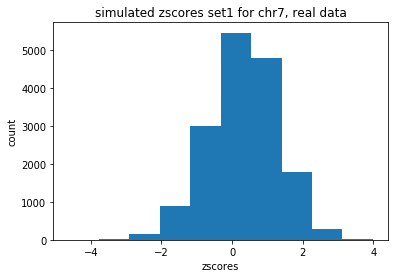

In [206]:
plt.hist(sim_zscores.T[0])
plt.xlabel('zscores')
plt.ylabel('count')
plt.title('simulated zscores set1 for chr7, real data')

Text(0.5, 1.0, 'simulated zscores set2 for chr7, real data')

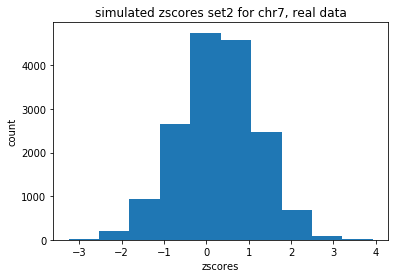

In [207]:
plt.hist(sim_zscores.T[1])
plt.xlabel('zscores')
plt.ylabel('count')
plt.title('simulated zscores set2 for chr7, real data')

In [176]:
stats.kstest(sim_zscores.T[1], 'norm')

KstestResult(statistic=0.12738980594663457, pvalue=8.625862703825805e-232)